# An Analysis of U.S. Labor Demographics and the Unemployment Rate(1972-2015) 
Braeden Wright | April 2022

------
# Project Goal

Analyze the U.S. Department of Labor statistics data for the U.S. labor force. Looking at the data, I want to try and predict future employment/ unemployment rate based on previous years data, if possible with the data available. Barring that, analyzing the data may also give insight into what populations have been affected the most when economic With the data being sorted within a timeframe, it will be an excellent opportunity to continue honing my time series analysis skills.

If any other notable trends appear they will certainly be investigated, and suggestions on how to better the dataframe or what other features would be helpful for analysis.

------
# Planning


- Setup github repository and environment (.gitignore, README.md)
- Import data from source (.csv)
- Prep data for exploration (rename, feature engineer)
- Explore questions about the data
- Visually represent findings
- Report conclusions and recommendations based on data analysis

-------
# Executive summary


### ***Key Takeaways***

- African American Unemployment Rates are generally double that of other populations, regardless of gender.  This same population will also decrease their Unemployment at a much faster pace



### ***Recommendations***

- The trends and potential seasonality can be used to predict future economic downturns and spikes in the Unemployment Rate.  
- We can get so much more from this data if we gather economic information furing the same span of time, especially if you look into what policies were put in place that may have directly lead to a drop in unemployment. 
- We need an accurate reference for Asian American Unemployment Rates, as well as other populations not represented such as LatinX Unemployment Rates


### ***Next Steps***

- As recommended, find a monthly representation of economic trends for the US and add/compare them to the Labor dataframe.  I can even imagine that it's possible to categorize causes of economic downturn, looking for potential variables that might explain the apparent seasonality


---------------



## Import Menagerie

In [1]:
# Basics
import numpy as np
import pandas as pd
import scipy.stats as stats
from pydataset import data
from scipy import math
import datetime
from datetime import datetime

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Models and Metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import sklearn.linear_model
import sklearn.feature_selection
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Custom
import wrangle

# Make sure we can see the full scale of the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# plotting defaults
plt.rc('figure', figsize=(11, 5))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# Data Aquisition and Preparation

Data is aquired and prepared with the wrangle.py file, and performs the following tasks:

   - Clean labor data by renaming columns (EVERY column)
   
   
   - Feature Engineer additional columns
   
   
   - Set datetime index using 'date'
   
   
   - Saves a copy of the prepared dataframe to a new .csv
   
   
   - Returns prepared df

In [2]:
df = wrangle.wrangle_labor()
df.head()

Saving to .csv


,month_num,month,year,asian_american_cnp,african_american_cnp,white_cnp,asian_american_not_in_labor_force,african_american_not_in_labor_force,white_not_in_labor_force,asian_american_civilian_labor_force,asian_american_clf_rate,asian_american_employed,Data.Employed.Asian.Unemployment Rate,asian_american_unemployed,asian_american_unemployment_rate,all_african_american_civilian_labor_force,male_african_american_civilian_labor_force,female_african_american_civilian_labor_force,all_african_american_clf_rate,male_african_american_clf_rate,female_african_american_clf_rate,all_white_civilian_labor_force,male_white_civilian_labor_force,female_white_civilian_labor_force,all_white_clf_rate,male_white_clf_rate,female_white_clf_rate,all_african_american_employed,male_african_american_employed,female_african_american_employed,all_african_american_employment_ratio,male_african_american_employment_ratio,female_african_american_employment_ratio,all_white_employed,male_white_employed,female_white_employed,employed_all_white_employment_ratio,employed_male_white_employment_ratio,employed_female_white_employment_ratio,all_african_american_unemployed,male_african_american_unemployed,female_african_american_unemployed,all_african_american_unemployment_rate,male_african_american_unemployment_rate,female_african_american_unemployment_rate,all_white_unemployed,male_white_unemployed,female_white_unemployed,all_white_unemployment_rate,male_white_unemployment_rate,female_white_unemployment_rate,total_civ_non_population,total_not_in_labor_force,avg_clf_rate,total_unemployed_pop,avg_female_clf_rate,avg_male_clf_rate,avg_female_unemployment_rate,avg_male_unemployment_rate,avg_total_unemployment_rate,unemployment_bin
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1972-01-01,1,January,1972,0.0,14332.0,126749.0,0.0,5998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8334.0,4180.0,3498.0,58.1,76.2,50.9,75608.0,43514.0,25728.0,59.7,81.7,42.7,7367.0,3802.0,3156.0,51.4,69.3,45.9,71169.0,41418.0,24403.0,56.1,77.7,40.5,967.0,378.0,343.0,11.6,9.0,9.8,4439.0,2096.0,1325.0,5.9,4.8,5.1,141081.0,5998.0,39.27,5406.0,46.80,78.95,7.45,6.90,5.83,avg
1972-02-01,2,February,1972,0.0,14381.0,126976.0,0.0,5943.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8438.0,4271.0,3499.0,58.7,77.7,50.7,75710.0,43502.0,25788.0,59.6,81.5,42.7,7465.0,3894.0,3188.0,51.9,70.8,46.2,71310.0,41441.0,24517.0,56.2,77.6,40.6,973.0,377.0,311.0,11.5,8.8,8.9,4400.0,2062.0,1271.0,5.8,4.7,4.9,141357.0,5943.0,39.43,5373.0,46.70,79.60,6.90,6.75,5.77,avg
1972-03-01,3,March,1972,0.0,14401.0,127191.0,0.0,5857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8544.0,4323.0,3533.0,59.3,78.5,51.2,76262.0,43812.0,25953.0,60.0,81.9,42.9,7626.0,3974.0,3204.0,53.0,72.1,46.4,72006.0,41849.0,24688.0,56.6,78.2,40.8,918.0,349.0,329.0,10.7,8.1,9.3,4256.0,1963.0,1265.0,5.6,4.5,4.9,141592.0,5857.0,39.77,5174.0,47.05,80.20,7.10,6.30,5.43,avg
1972-04-01,4,April,1972,0.0,14434.0,127372.0,0.0,5952.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8483.0,4330.0,3496.0,58.8,78.3,50.6,76256.0,43821.0,25816.0,59.9,81.7,42.7,7704.0,4032.0,3236.0,53.4,72.9,46.8,72378.0,42085.0,24589.0,56.8,78.5,40.6,779.0,298.0,260.0,9.2,6.9,7.4,3878.0,1736.0,1227.0,5.1,4.0,4.8,141806.0,5952.0,39.57,4657.0,46.65,80.00,6.10,5.45,4.77,low
1972-05-01,5,May,1972,0.0,14486.0,127601.0,0.0,5914.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8572.0,4364.0,3542.0,59.2,78.7,51.2,76421.0,43843.0,25889.0,59.9,81.6,42.7,7775.0,4063.0,3245.0,53.7,73.3,46.9,72898.0,42319.0,24647.0,57.1,78.8,40.7,797.0,302.0,297.0,9.3,6.9,8.4,3523.0,1525.0,1242.0,4.6,3.5,4.8,142087.0,5914.0,39.70,4320.0,46.95,80.15,6.60,5.20,4.63,low


***Set up train, validate, test variables to use as needed***

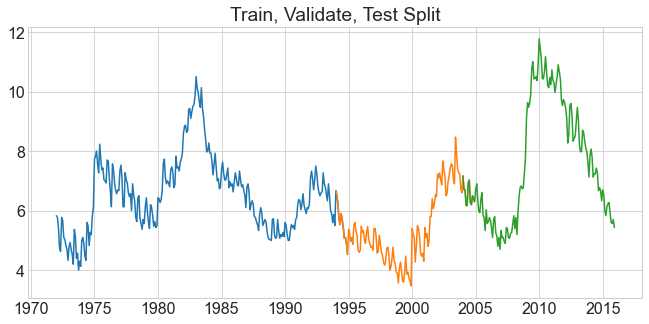

In [3]:
train = df.loc[:'1994']
validate = df.loc['1994':'2004']
test = df.loc['2004':]

plt.plot(train.index, train.avg_total_unemployment_rate)
plt.plot(validate.index, validate.avg_total_unemployment_rate)
plt.plot(test.index, test.avg_total_unemployment_rate)
plt.title('Train, Validate, Test Split')
plt.show()

# Data Exploration

## Initial Questions

* Is there a noticable trend or seasonality present in the data?


* Has unemployment rate increased for one population over another?


* What gender improved their employment rate the most?


* Does each demographic(gender, race) grow at the same rate?


* Do we see an even distribution of employment between different dempographics over time?

-------

# Is there a noticable trend or seasonality present in the data?

<AxesSubplot:xlabel='date', ylabel='avg_total_unemployment_rate'>

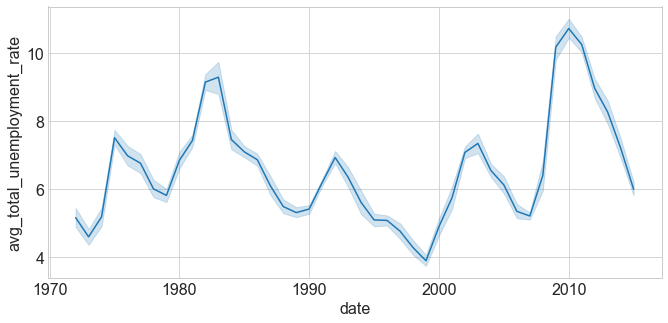

In [4]:
# Visualize changes in unemployment rate over time.  Use 'avg_total_unemployment_rate'

sns.lineplot(data=df, y='avg_total_unemployment_rate', x=df.index.year)

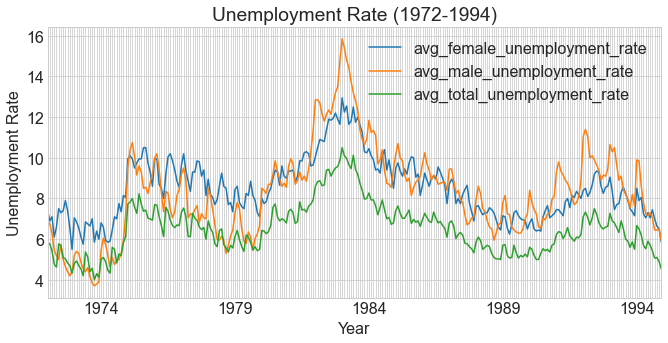

In [5]:
# Not a strong trend, but every 7-10 years there seems to be a rise in unemployment rate

# potential target variables
y1 = train.avg_female_unemployment_rate
y2 = train.avg_male_unemployment_rate
y3 = train.avg_total_unemployment_rate 	

y1.plot()
y2.plot()
y3.plot()
plt.legend()
plt.title('Unemployment Rate (1972-1994)')
plt.ylabel('Unemployment Rate')
plt.xlabel('Year')
plt.xticks(train.index)
plt.show()

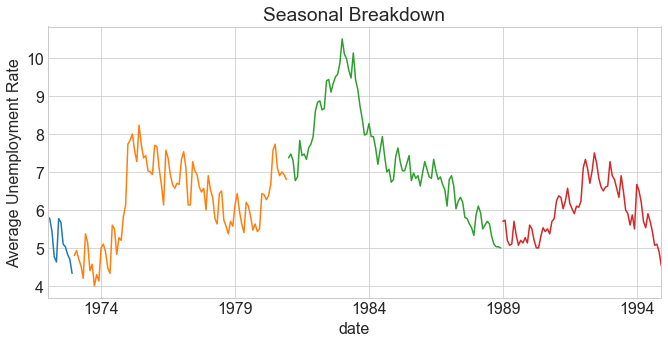

In [6]:
# 'Seasons' of High Unemployment 
y3.resample('8Y').plot(title='Seasonal Breakdown')
plt.ylabel('Average Unemployment Rate')
plt.show()

In [7]:
df.groupby('unemployment_bin').resample('10Y').size().unstack(-1)

date,1972-12-31,1975-12-31,1982-12-31,1985-12-31,1992-12-31,1995-12-31,2002-12-31,2005-12-31,2012-12-31,2015-12-31,2022-12-31
unemployment_bin,,,,,,,,,,,
low,7.0,NaN,19.0,NaN,19.0,NaN,70.0,NaN,17.0,NaN,NaN
avg,5.0,NaN,29.0,NaN,37.0,NaN,27.0,NaN,24.0,NaN,11.0
high,NaN,4.0,NaN,47.0,NaN,35.0,NaN,31.0,NaN,16.0,NaN
very high,NaN,8.0,NaN,49.0,NaN,1.0,NaN,8.0,NaN,64.0,NaN


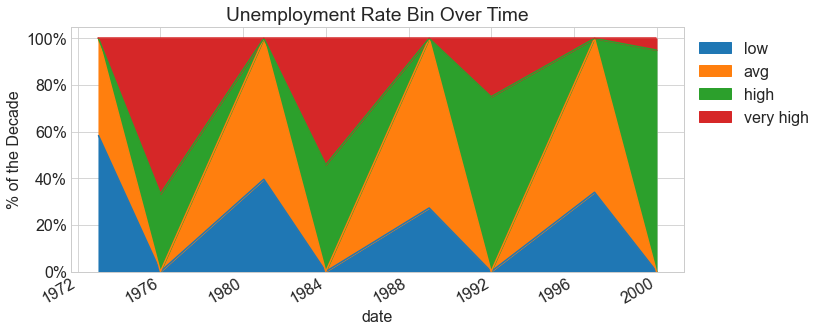

In [8]:
ax = (train.groupby('unemployment_bin')
 .resample('8Y')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area(title='Unemployment Rate Bin Over Time', ylabel='% of the Decade'))
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.yaxis.set_major_formatter('{:.0%}'.format)

### Takeaways:

- **Possible seasonality, however the causes behind these spikes in Unemployment are most likely influenced by multiple different variables and would be difficult to predict with the data I currently have available** 


- **Starting in the 1980's there was a change in trend where avg_female_unemployment_rate drops below avg_male_unemployment_rate, counter to previous data**

-------

# Has unemployment rate increased for one population over another?

# And...
# What gender improved their employment rate the most?

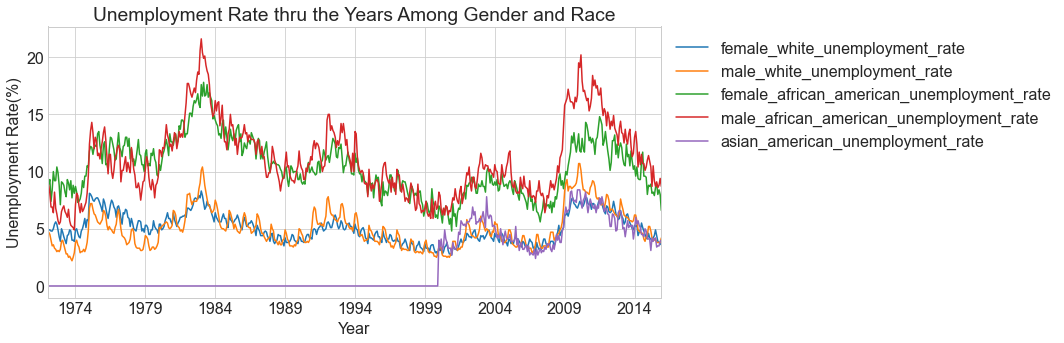

In [9]:
# List of columns to compare
cols = ['female_white_unemployment_rate', 'male_white_unemployment_rate', 'female_african_american_unemployment_rate', 'male_african_american_unemployment_rate', 'asian_american_unemployment_rate']

df[cols].plot()
plt.xlabel('Year')
plt.ylabel('Unemployment Rate(%)')
plt.title('Unemployment Rate thru the Years Among Gender and Race')
plt.legend(loc=0, bbox_to_anchor=(1, 1))
plt.show()

In [23]:
# Variables for graphing and calculating Means
aa = df.resample('y')['all_african_american_unemployment_rate'].apply(lambda x: x.pct_change().shift(-1))
aa_male = df.resample('y')['male_african_american_unemployment_rate'].apply(lambda x: x.pct_change().shift(-1))
aa_female = df.resample('y')['male_african_american_unemployment_rate'].apply(lambda x: x.pct_change().shift(-1))
white = df.resample('y')['all_white_unemployment_rate'].apply(lambda x: x.pct_change().shift(-1))
white_male = df.resample('y')['male_white_unemployment_rate'].apply(lambda x: x.pct_change().shift(-1))
white_female = df.resample('y')['female_white_unemployment_rate'].apply(lambda x: x.pct_change().shift(-1))
asian = df.resample('y')['asian_american_unemployment_rate'].apply(lambda x: x.pct_change().shift(-1))
female = df.resample('y')['avg_female_unemployment_rate'].apply(lambda x: x.pct_change().shift(-1))
male = df.resample('y')['avg_male_unemployment_rate'].apply(lambda x: x.pct_change().shift(-1))

print('African American Mean Rate of Yearly Change')
print(round((aa.mean()*100),2))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Female African American Mean Rate of Yearly Change')
print(round((aa_female.mean()*100),2))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Male African American Mean Rate of Yearly Change')
print(round((aa_male.mean()*100),2))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('White Mean Rate of Yearly Change')
print(round((white.mean()*100),2))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Female White Mean Rate of Yearly Change')
print(round((white_female.mean()*100),2))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Male White Mean Rate of Yearly Change')
print(round((white_male.mean()*100),2))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Asian American Mean Rate of Yearly Change')
print(round((asian.mean()*100),2))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Female Mean Rate of Yearly Change')
print(round((female.mean()*100),2))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Male Mean Rate of Yearly Change')
print(round((male.mean()*100),2))

African American Mean Rate of Yearly Change
-0.57
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Female African American Mean Rate of Yearly Change
-0.72
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Male African American Mean Rate of Yearly Change
-0.72
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
White Mean Rate of Yearly Change
-1.38
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Female White Mean Rate of Yearly Change
-1.24
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Male White Mean Rate of Yearly Change
-1.39
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Asian American Mean Rate of Yearly Change
0.52
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Female Mean Rate of Yearly Change
-0.79
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Male Mean Rate of Yearly Change
-1.01


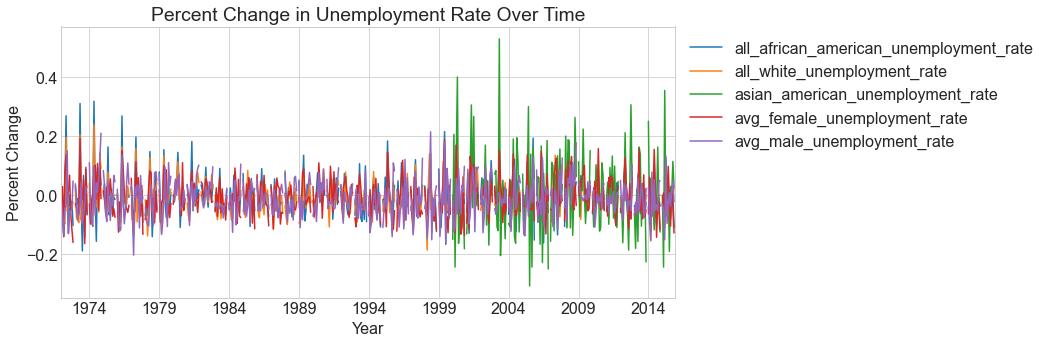

In [24]:
aa.plot()
white.plot()
asian.plot()
female.plot()
male.plot()
plt.title('Percent Change in Unemployment Rate Over Time')
plt.ylabel('Percent Change')
plt.xlabel('Year')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

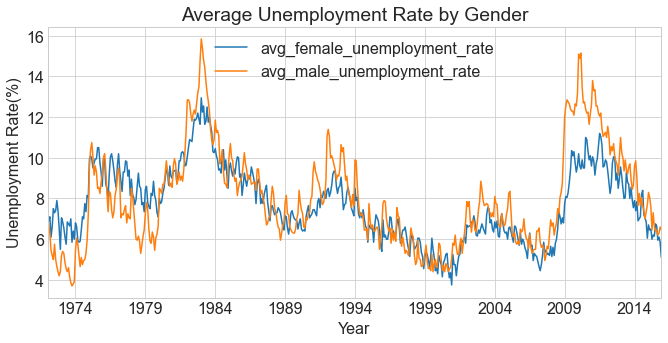

In [10]:
cols = ['avg_female_unemployment_rate', 'avg_male_unemployment_rate']

df[cols].plot()
plt.xlabel('Year')
plt.ylabel('Unemployment Rate(%)')
plt.title('Average Unemployment Rate by Gender')
plt.show()

### Takeaways:

- **Good visualization of the missing data for asian_american_unemployment_rate** 


- **Jumps in the Unemployment Rate seems to affect each demographic and gender, however it seems that African American Females tend to retain a lower unemployment rate vs. their Male counterpart (this was not the case for white females)**


- **Unemployment Rate for African Americans is usually double that of the White populations, regardless of gender.  Similarly, jumps in unemployment rate tend to more negatively affect African Americans, and in periods of falling unemployment rates they tend to decrease their rates at a faster pace.**


- **Female Unemployment Rate performed had a better long term performance, with a tendency to keep their unemployment rate from jumping up as much as the Male unemployment rate** 


- **The Asian American Population was the only demographic to Positive Mean Rate of Yearly Change, however this is likely skewed due to the lack of information regarding the Asian American Population until the year 2000.**
-------

# Does each demographic(gender, race) grow at the same rate?

- I can compare the rate of change between the following demographics:

    - African American
    - White
    - Asian American
    - Female
    - Male
    
# And, do we see an even distribution of employment between different demographics over time?

In [26]:
# Set up variables to graph with
aa2 = df.resample('y')['all_african_american_civilian_labor_force'].apply(lambda x: x.pct_change().shift(-1))
aa_male2 = df.resample('y')['male_african_american_civilian_labor_force'].apply(lambda x: x.pct_change().shift(-1))
aa_female2 = df.resample('y')['male_african_american_civilian_labor_force'].apply(lambda x: x.pct_change().shift(-1))
white2 = df.resample('y')['all_white_civilian_labor_force'].apply(lambda x: x.pct_change().shift(-1))
white_male2 = df.resample('y')['male_white_civilian_labor_force'].apply(lambda x: x.pct_change().shift(-1))
white_female2 = df.resample('y')['female_white_civilian_labor_force'].apply(lambda x: x.pct_change().shift(-1))
asian2 = df.resample('y')['asian_american_civilian_labor_force'].apply(lambda x: x.pct_change().shift(-1))
female2 = df.resample('y')['avg_female_clf_rate'].apply(lambda x: x.pct_change().shift(-1))
male2 = df.resample('y')['avg_male_clf_rate'].apply(lambda x: x.pct_change().shift(-1))

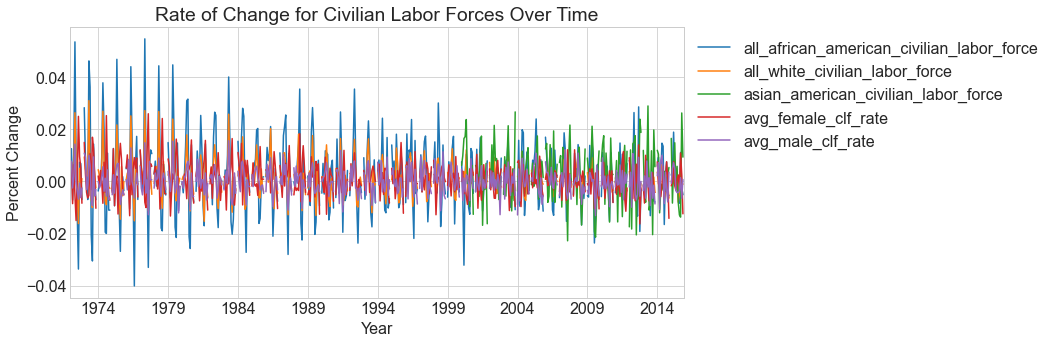

In [40]:
aa2.plot()
white2.plot()
asian2.plot()
female2.plot()
male2.plot()
plt.title('Rate of Change for Civilian Labor Forces Over Time')
plt.ylabel('Percent Change')
plt.xlabel('Year')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

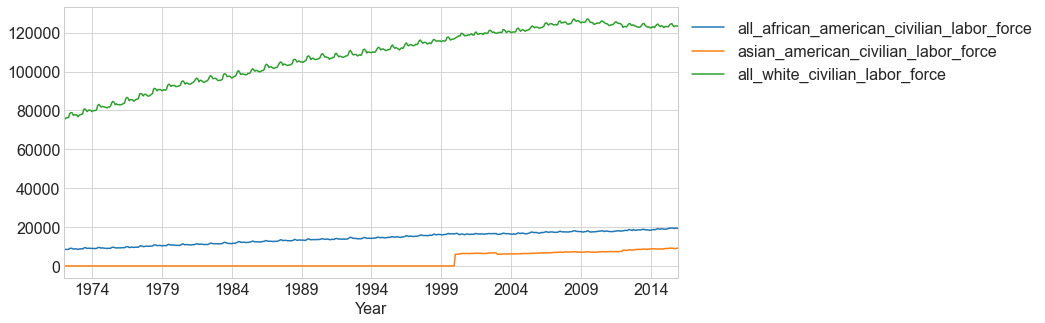

In [36]:
df['all_african_american_civilian_labor_force'].plot()
df['asian_american_civilian_labor_force'].plot()
df['all_white_civilian_labor_force'].plot()
plt.xlabel('Year')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

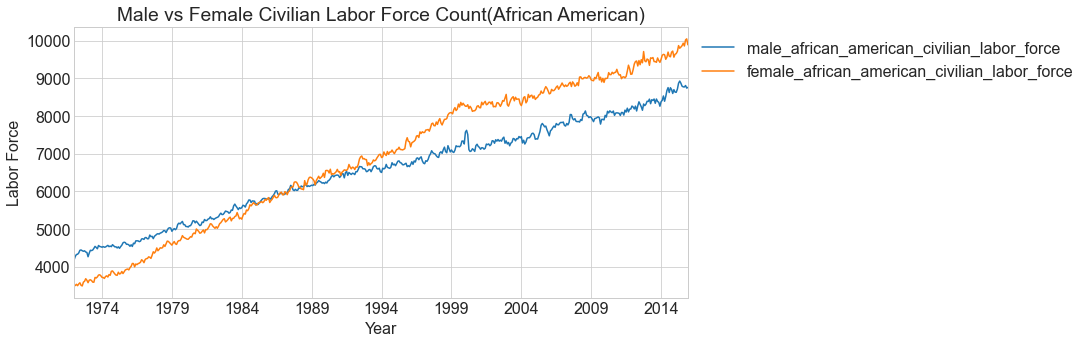

In [38]:
df['male_african_american_civilian_labor_force'].plot()
df['female_african_american_civilian_labor_force'].plot()
plt.title('Male vs Female Civilian Labor Force Count(African American)')
plt.xlabel('Year')
plt.ylabel('Labor Force')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

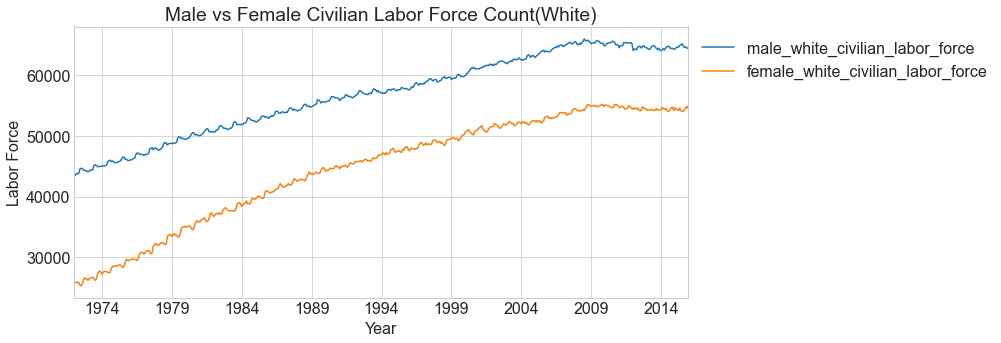

In [39]:
df['male_white_civilian_labor_force'].plot()
df['female_white_civilian_labor_force'].plot()
plt.title('Male vs Female Civilian Labor Force Count(White)')
plt.xlabel('Year')
plt.ylabel('Labor Force')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

### Takeaways:

- **The African American Labor Force had the most volitility in their numbers, with bigger shifts in their Labor Force overall**


- **The Female African American Work Force has outgrown it's Male counterpart** 


- **The White Labor Force grows at a slower rate, however due to containing the majority of the total population their Labor Force actual grew 4x more than other demographics** 


# Conclusion

**After exploring the data and looking for trends that could help predict future jumps in the unemployment rate, my analysis concludes that there is too little information to make an accurate prediction.  That being said, with a bit more research and feature engineering or expanding the dataframe with details from other data sources(), the insights here will be used to predict the jumps in unemployment and possibly even offer ways to reduce the damage**

### ***Key Takeaways***

- There is a possible seasonality about a decade in length that can predict high jumps in the unemployment rate of every demographic.

- African American Unemployment Rates are generally double that of other populations, regardless of gender.  This same population will also decrease their Unemployment at a much faster pace. 

- The White Labor Force grows at a slower rate, however due to containing the majority of the total population their Labor Force actual grew 4x more than other demographics

- Jumps in the Unemployment Rate seems to affect each demographic and gender, however it seems that African American Females tend to retain a lower unemployment rate vs. their Male counterpart (this was not the case for white females)


### ***Recommendations***
- The trends and potential seasonality can be used to predict future economic downturns and spikes in the Unemployment Rate.  
- We can get so much more from this data if we gather economic information furing the same span of time, especially if you look into what policies were put in place that may have directly lead to a drop in unemployment. 
- We need an accurate reference for Asian American Unemployment Rates, as well as other populations not represented such as LatinX Unemployment Rates

### ***Next Steps***
- As recommended, find a monthly representation of economic trends for the US and add/compare them to the Labor dataframe.  I can even imagine that it's possible to categorize causes of economic downturn, looking for potential variables that might explain the apparent seasonality
- Find data related to policies/variables that took place around jumps in unemployment rates

------
# Thank You!